## Loan Prediction Analysis - Classification

Dataset Information
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Read the dataset

In [2]:
df=pd.read_csv("Loan Prediction Dataset.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head(60)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.shape

(614, 13)

## Data Preprocessing

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Fill the NaN values

In [9]:
#Fill the missing values for numerical terms - mean
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [10]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df.head(60)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.000000,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.000000,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.000000,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.000000,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,Semiurban,N


## Exploratory Data Analysis

### Categorical attributes visualization

<Axes: xlabel='Gender', ylabel='count'>

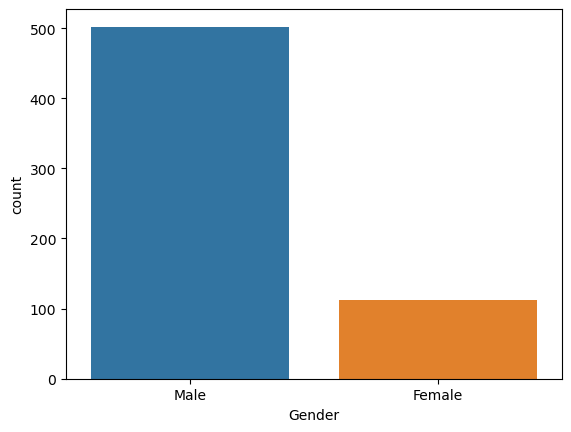

In [14]:
sns.countplot(x="Gender",data=df)

<Axes: xlabel='Married', ylabel='count'>

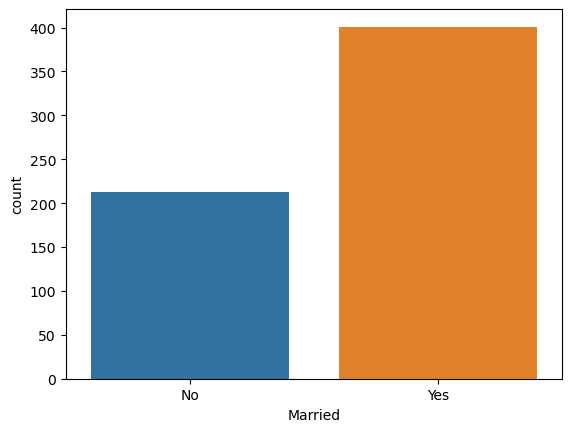

In [15]:
sns.countplot(x="Married",data=df)

<Axes: xlabel='Dependents', ylabel='count'>

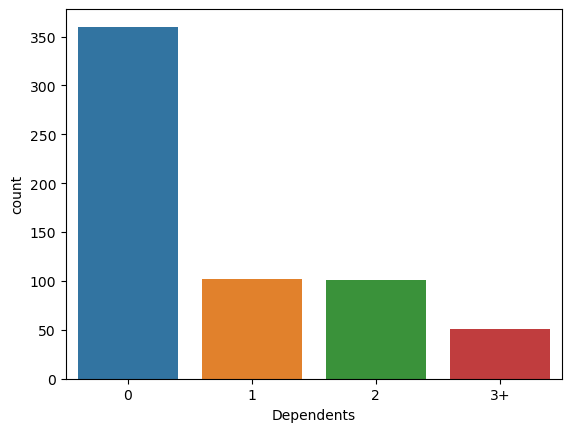

In [16]:
sns.countplot(x="Dependents",data=df)

<Axes: xlabel='Education', ylabel='count'>

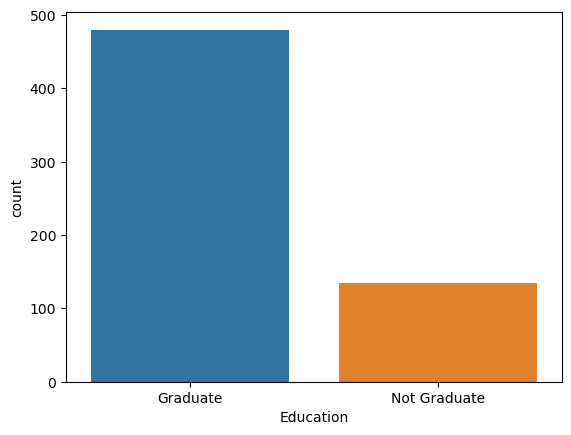

In [17]:
sns.countplot(x="Education",data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

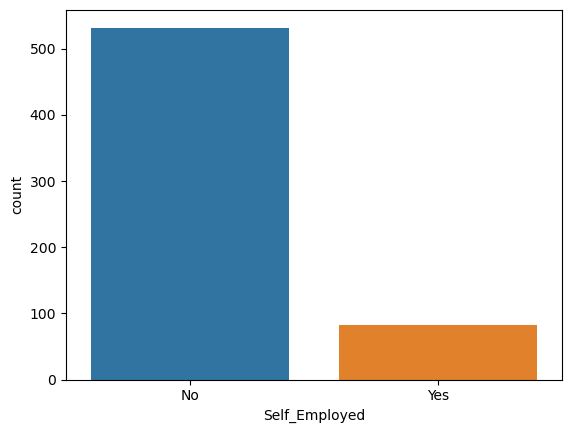

In [18]:
sns.countplot(x="Self_Employed",data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

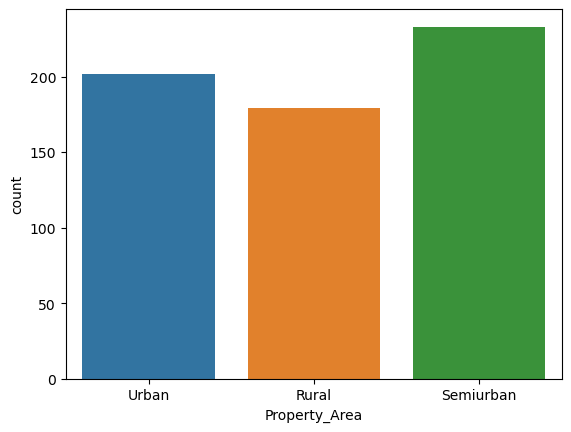

In [19]:
sns.countplot(x="Property_Area",data=df)

<Axes: xlabel='Loan_Status', ylabel='count'>

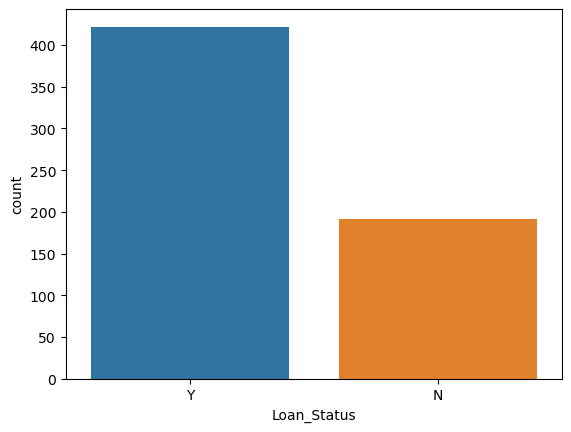

In [20]:
sns.countplot(x="Loan_Status",data=df)

### Numerical attributes visualization

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

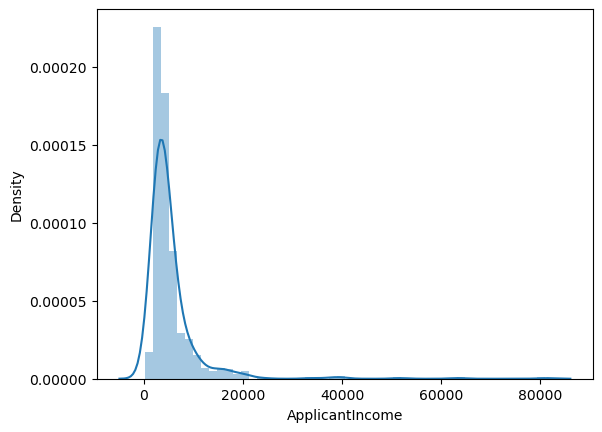

In [21]:
sns.distplot(df["ApplicantIncome"])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

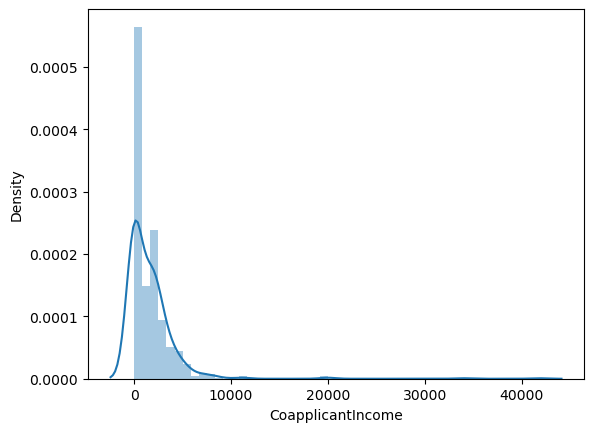

In [22]:
sns.distplot(df["CoapplicantIncome"])

<Axes: xlabel='LoanAmount', ylabel='Density'>

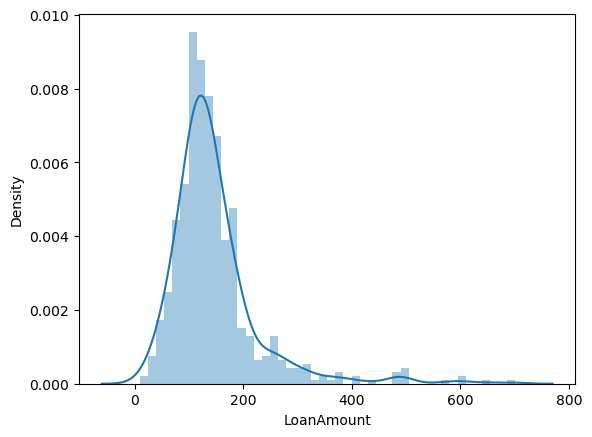

In [23]:
sns.distplot(df["LoanAmount"])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

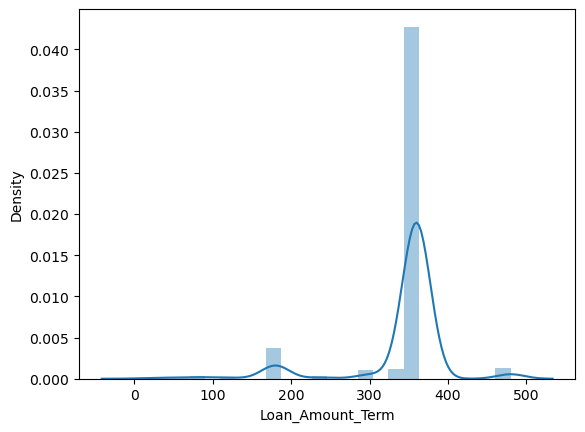

In [24]:
sns.distplot(df['Loan_Amount_Term'])

<Axes: xlabel='Credit_History', ylabel='Density'>

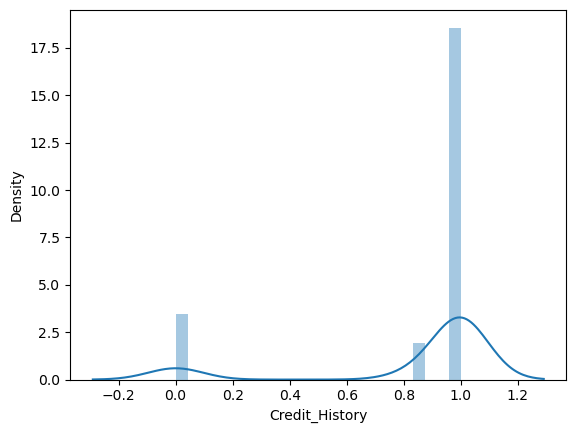

In [25]:
sns.distplot(df['Credit_History'])

## Create new attribute "Total Income"

We are going to create a new column called Total Income by adding the applicant and coapplicant income

In [26]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


## Log Transformation

### Apply log transformation to the attribute

0    8.674197
1    8.430327
2    8.006701
3    7.857094
4    8.699681
Name: ApplicantIncomeLog, dtype: float64


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

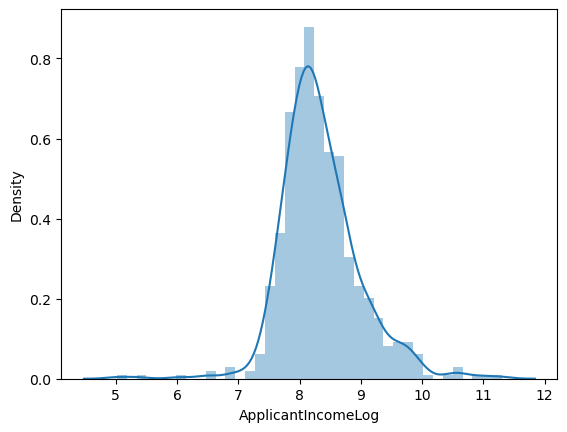

In [27]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
print(df['ApplicantIncomeLog'].head())
sns.distplot(df["ApplicantIncomeLog"])

0    0.000000
1    7.319202
2    0.000000
3    7.765993
4    0.000000
Name: CoapplicantIncomeLog, dtype: float64


<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

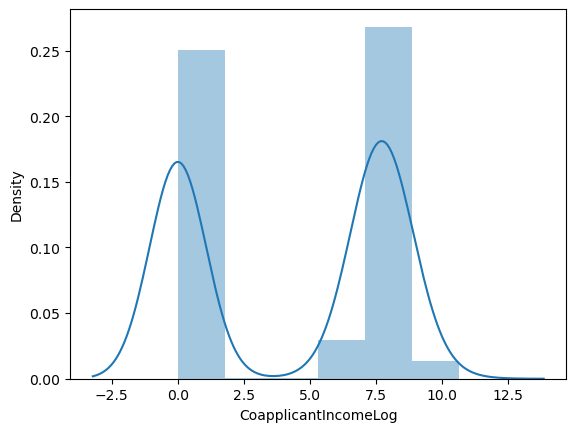

In [28]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
print(df['CoapplicantIncomeLog'].head())
sns.distplot(df["CoapplicantIncomeLog"])

0    4.993232
1    4.859812
2    4.204693
3    4.795791
4    4.955827
Name: LoanAmountLog, dtype: float64


<Axes: xlabel='LoanAmountLog', ylabel='Density'>

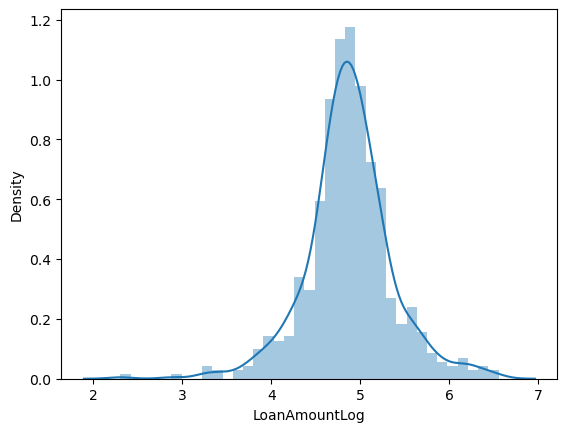

In [29]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
print(df['LoanAmountLog'].head())
sns.distplot(df["LoanAmountLog"])

0    5.888878
1    5.888878
2    5.888878
3    5.888878
4    5.888878
Name: Loan_Amount_Term_Log, dtype: float64


<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

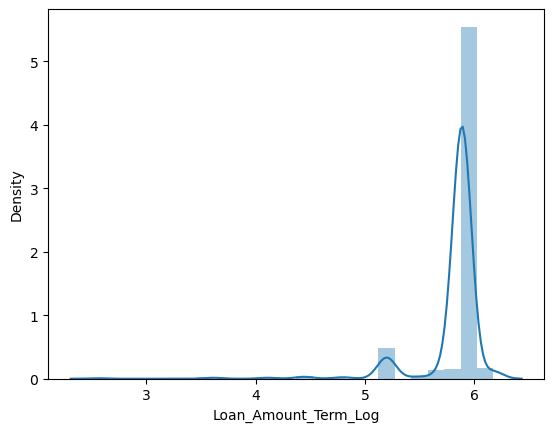

In [30]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
print(df['Loan_Amount_Term_Log'].head())
sns.distplot(df["Loan_Amount_Term_Log"])

0    8.674197
1    8.714732
2    8.006701
3    8.505525
4    8.699681
Name: Total_Income_Log, dtype: float64


<Axes: xlabel='Total_Income_Log', ylabel='Density'>

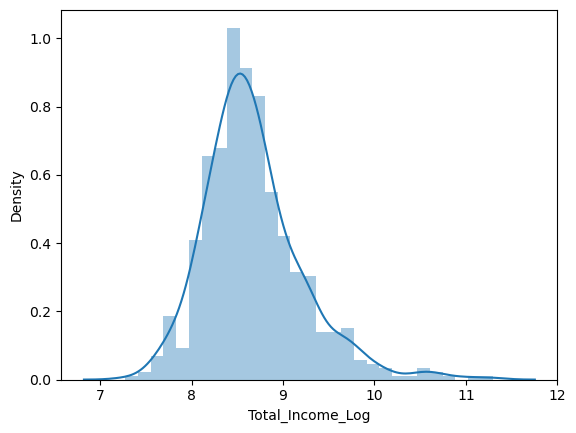

In [31]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
print(df['Total_Income_Log'].head())
sns.distplot(df["Total_Income_Log"])

### Coorelation Matrix

<Axes: >

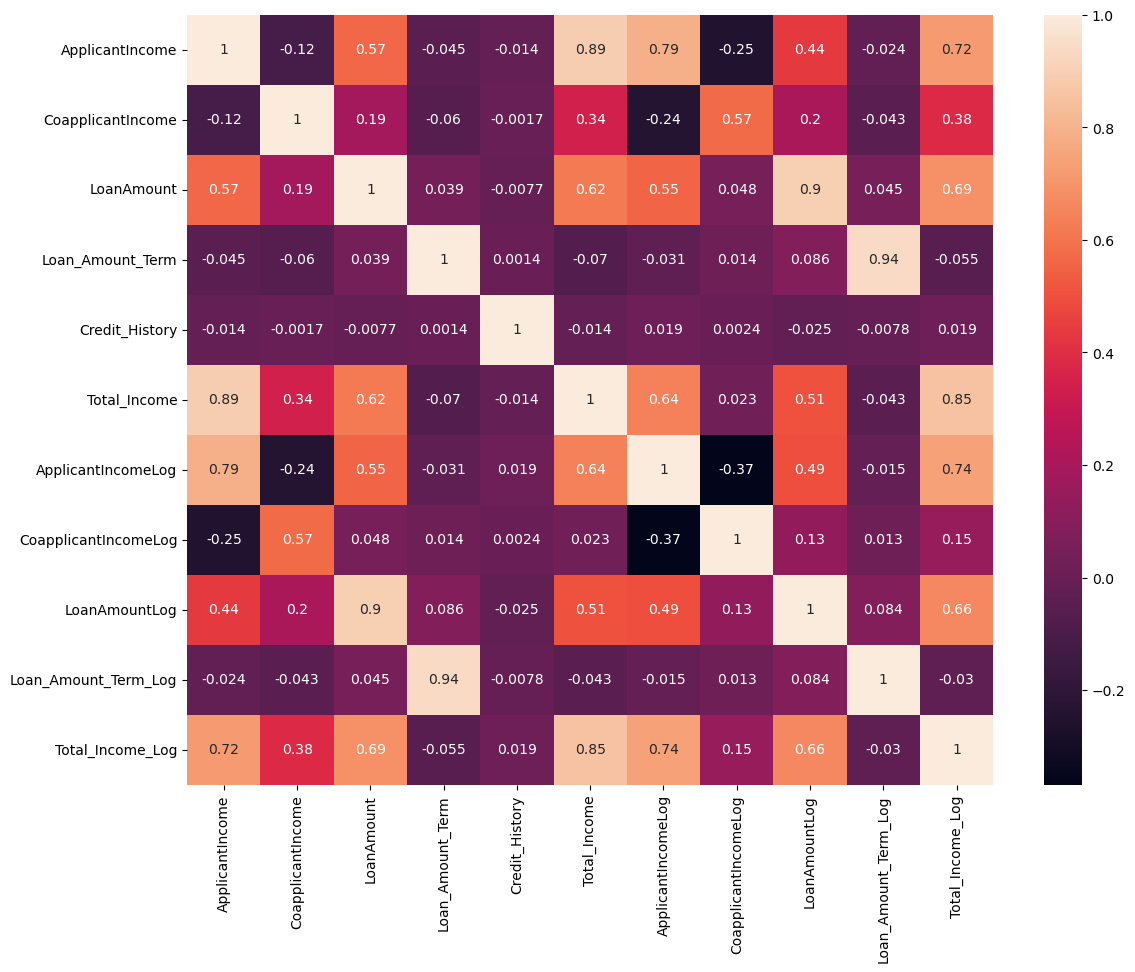

In [32]:
corr=df.corr()
plt.figure(figsize=(13,10))
sns.heatmap(corr,annot=True)

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [34]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'ApplicantIncomeLog', 'CoapplicantIncomeLog',
       'LoanAmountLog', 'Loan_Amount_Term_Log', 'Total_Income_Log'],
      dtype='object')

In [35]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [36]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'ApplicantIncomeLog',
       'LoanAmountLog', 'Loan_Amount_Term_Log', 'Total_Income_Log'],
      dtype='object')

## Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
cols = ['Gender',"Married","Dependents","Education",'Self_Employed',"Property_Area","Loan_Status"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [39]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


## Split data into X & y

In [40]:
# specify input and output attributes

In [41]:
X = df.drop(columns=['Loan_Status'], axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [42]:
y = df['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

## Split data into test and train

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Model Training

In [66]:
# classify function
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    model.fit(x_train, y_train)
    
    prediction=model.predict(x_test)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)
    report=metrics.classification_report(y_test,prediction)
    print("Classification Report:\n",report)
    matrix=metrics.confusion_matrix(y_test,prediction)
    print("Confusion Matrix:\n",matrix)
    plt.figure(figsize=(4,3))
    sns.heatmap(matrix,annot=True)
    accuracy=metrics.accuracy_score(y_test,prediction)
    print("Accuracy Score:",accuracy*100)

Accuracy is 79.22077922077922
Cross validation is 80.9462881514061
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.39      0.54        49
           1       0.77      0.98      0.87       105

    accuracy                           0.79       154
   macro avg       0.84      0.68      0.70       154
weighted avg       0.82      0.79      0.76       154

Confusion Matrix:
 [[ 19  30]
 [  2 103]]
Accuracy Score: 79.22077922077922


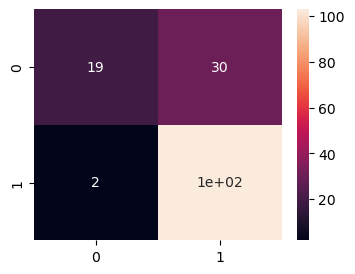

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 72.72727272727273
Cross validation is 70.52512328401971
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.55      0.56        49
           1       0.79      0.81      0.80       105

    accuracy                           0.73       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.72      0.73      0.73       154

Confusion Matrix:
 [[27 22]
 [20 85]]
Accuracy Score: 72.72727272727273


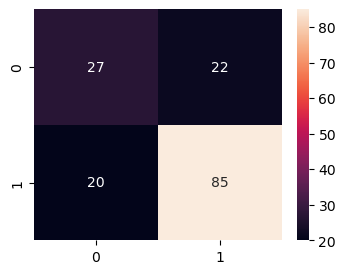

In [68]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 77.85152605624417
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.45      0.56        49
           1       0.78      0.93      0.85       105

    accuracy                           0.78       154
   macro avg       0.77      0.69      0.71       154
weighted avg       0.78      0.78      0.76       154

Confusion Matrix:
 [[22 27]
 [ 7 98]]
Accuracy Score: 77.92207792207793


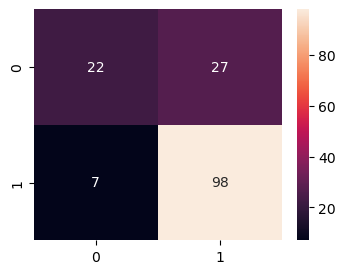

In [69]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
classify(model, X, y)

Accuracy is 74.02597402597402
Cross validation is 76.87858190057311
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.49      0.55        49
           1       0.78      0.86      0.82       105

    accuracy                           0.74       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.73      0.74      0.73       154

Confusion Matrix:
 [[24 25]
 [15 90]]
Accuracy Score: 74.02597402597402


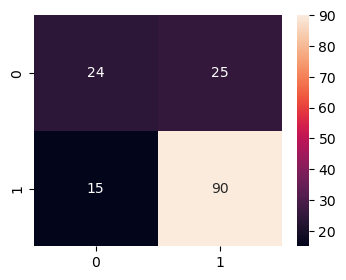

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 75.97402597402598
Cross validation is 75.56977209116353
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.29      0.43        49
           1       0.75      0.98      0.85       105

    accuracy                           0.76       154
   macro avg       0.81      0.63      0.64       154
weighted avg       0.79      0.76      0.72       154

Confusion Matrix:
 [[ 14  35]
 [  2 103]]
Accuracy Score: 75.97402597402598


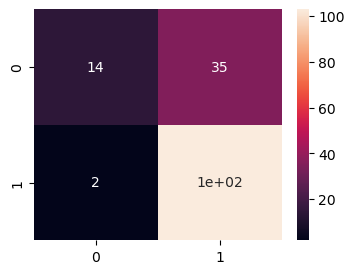

In [71]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=5)
classify(model,X,y)

Accuracy is 68.18181818181817
Cross validation is 69.70545115287219
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.68      1.00      0.81       105

    accuracy                           0.68       154
   macro avg       0.34      0.50      0.41       154
weighted avg       0.46      0.68      0.55       154

Confusion Matrix:
 [[  0  49]
 [  0 105]]
Accuracy Score: 68.18181818181817


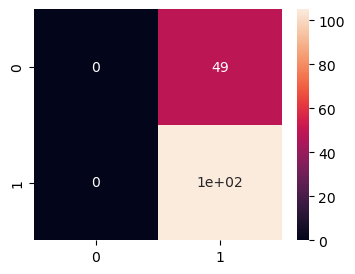

In [72]:
from sklearn.svm import SVC
model=SVC()
classify(model,X,y)

Accuracy is 78.57142857142857
Cross validation is 79.31627349060376
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.39      0.54        49
           1       0.77      0.97      0.86       105

    accuracy                           0.79       154
   macro avg       0.82      0.68      0.70       154
weighted avg       0.80      0.79      0.76       154

Confusion Matrix:
 [[ 19  30]
 [  3 102]]
Accuracy Score: 78.57142857142857


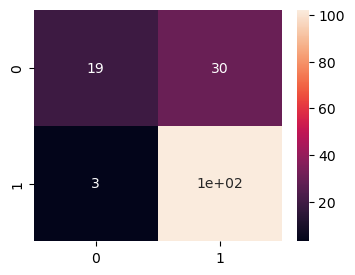

In [73]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
classify(model,X,y)

As we can see,in above all these algorithms the logistic regression algorithm provides high accuracy.

## Hyperparameter tuning

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid={"C":np.logspace(-4, 4, 30),"solver":["liblinear"]}

model=GridSearchCV(LogisticRegression(),param_grid=param_grid,verbose=True)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Accuracy is 79.22077922077922
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Cross validation is 80.78368652538984
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.39      0.54        49
           1       0.77      0.98      0.87       105

    accuracy                           0.79       154
   macro avg       0.84      0.68      0.70       154
weighted avg       0.82      0.79      0.76       154

Confusion Matrix:
 [[ 19  30]
 [  2 103]]
Accuracy Score: 79.22077922077922


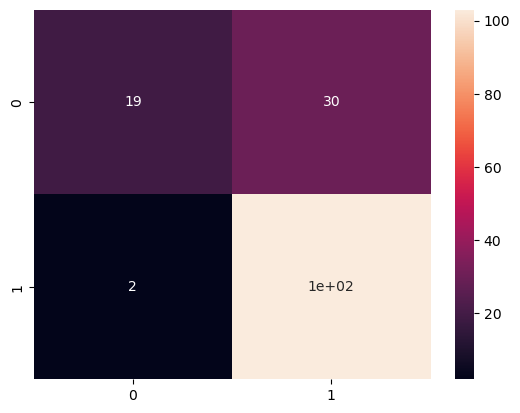

In [54]:
classify(model,X,y)